In [32]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.decomposition
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics

In [33]:
#loading dataset
exceldata = pd.read_excel('Daily data.xlsx')
exceldata.to_csv ('daily.csv', index = None, header=True)
data = pd.read_csv('daily.csv',header=[0, 1,2], index_col=[0])
#data cleaning
data = data.iloc[: , :-3]
data = data.iloc[:-1,:]

In [34]:
#feature scaling
df_min_max_scaled = data.astype(float)
for column in df_min_max_scaled.columns:
    df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min())

In [35]:
#feature selection
cov_mat = np.cov(df_min_max_scaled.transpose())
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print("""
PCA 1: {0:.2f}% of the variance
PCA 2:  {1:.2f}% of the variance
PCA 3:  {2:.2f}% of the variance
PCA 4:  {3:.2f}% of the variance
PCA 5:  {4:.2f}% of the variance
PCA 6:  {5:.2f}% of the variance
PCA 7:  {6:.2f}% of the variance
PCA 8:  {7:.2f}% of the variance
PCA 9:  {8:.2f}% of the variance
PCA 10:  {9:.2f}% of the variance
PCA 11:  {10:.2f}% of the variance
PCA 12:  {11:.2f}% of the variance
PCA 13:  {12:.2f}% of the variance
""".format(*tuple(eig_vals / np.sum(eig_vals) * 100)))


PCA 1: 52.57% of the variance
PCA 2:  33.52% of the variance
PCA 3:  4.51% of the variance
PCA 4:  3.65% of the variance
PCA 5:  2.39% of the variance
PCA 6:  1.57% of the variance
PCA 7:  0.74% of the variance
PCA 8:  0.50% of the variance
PCA 9:  0.33% of the variance
PCA 10:  0.17% of the variance
PCA 11:  0.05% of the variance
PCA 12:  -0.00% of the variance
PCA 13:  0.01% of the variance



In [47]:
sklearn_pca = sklearn.decomposition.PCA(n_components=3)
sklearn_pca.fit(df_min_max_scaled[df_min_max_scaled.columns])
df_3D = pd.DataFrame(sklearn_pca.transform(df_min_max_scaled[df_min_max_scaled.columns]),index=df_min_max_scaled.index,
                     columns=['PCA1', 'PCA2','PCA3'])
df_3D.head()

,PCA1,PCA2,PCA3
Ahrweiler,-0.103381,-0.266256,-0.190461
Altenkirchen,0.177951,-0.038638,0.123866
Alzey-Worms,0.226158,-0.130798,0.472820
Bad Dürkheim,0.221548,0.106351,0.023302
Bad Kreuznach,0.774604,0.539808,-0.266919


C:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


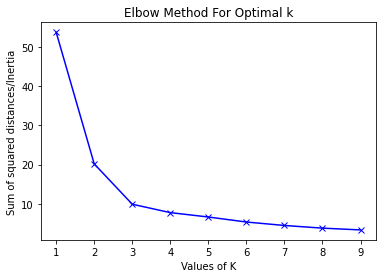

In [58]:
#Finding optimal number of cluster using elbow method
Sum_of_squared_distances = []
K = range(1,10)
for num_clusters in K :
    kmean = KMeans(n_clusters=num_clusters)
    kmean.fit(df_3D)
    Sum_of_squared_distances.append(kmean.inertia_)
plt.plot(K,Sum_of_squared_distances,'bx-')
plt.xlabel("Values of K") 
plt.ylabel("Sum of squared distances/Inertia") 
plt.title("Elbow Method For Optimal k")
plt.savefig('elbow.jpg')
plt.show()

In [48]:
#Kmeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(df_3D)
kmeans.labels_

array([0, 2, 2, 2, 2, 0, 0, 0, 1, 1, 2, 1, 0, 2, 2, 2, 0, 2, 2, 0, 1, 2,
       1, 2, 0, 1, 0, 0, 2, 2, 0, 0, 0, 0, 0, 1])

In [49]:
#Aglomerative Heirarichal Clustering
agclustering = AgglomerativeClustering(n_clusters=3).fit(df_3D)
agclustering.labels_

array([2, 0, 0, 0, 0, 2, 2, 2, 1, 1, 0, 0, 1, 0, 0, 0, 2, 0, 0, 2, 0, 0,
       1, 0, 2, 0, 2, 2, 0, 0, 1, 1, 2, 2, 2, 1], dtype=int64)

In [51]:
#Evaluation of kmeans
kSil = metrics.silhouette_score(df_3D, kmeans.labels_)
kCH = metrics.calinski_harabasz_score(df_3D, kmeans.labels_)
kDB = metrics.davies_bouldin_score(df_3D, kmeans.labels_)
print(kSil)
print(kCH)
print(kDB)

0.34207307007464416
24.957592428614667
0.8897896254651118


In [52]:
#Evaluation of AHC
agSil = metrics.silhouette_score(df_3D, agclustering.labels_)
agCH = metrics.calinski_harabasz_score(df_3D, agclustering.labels_)
agDB = metrics.davies_bouldin_score(df_3D, agclustering.labels_)
print(agSil)
print(agCH)
print(agDB)

0.27498468193653647
18.957955931292666
0.9458443524769296


In [53]:
#Adding kmeans clusters to preprocessed data
df_3D['Cluster'] = kmeans.labels_

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


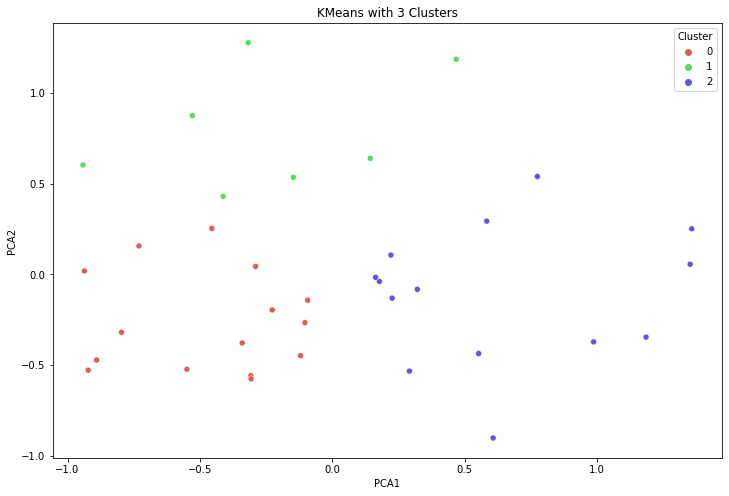

In [59]:
#Plotting PCAs against clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(df_3D["PCA1"], df_3D["PCA2"], hue=df_3D['Cluster'], 
                palette=sns.color_palette('hls', 3))
plt.title('KMeans with 3 Clusters')
plt.savefig('clusters.jpg')
plt.show()